In [104]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import itertools
import xgboost as xgb
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cross_validation import *
from sklearn.grid_search import GridSearchCV

In [112]:
trainSet = pd.read_csv('data/SuperCleanAlmost.csv')

trainSet = trainSet.set_index('id')

##trainSet = trainSet.drop(['poster_path'], axis=1)
##trainSet = trainSet.drop(['backdrop_path'], axis=1)
##trainSet = trainSet.drop(['adult'], axis = 1)

trainSet = trainSet.drop(['genres'], axis=1)
trainSet = trainSet.drop(['original_language'], axis=1)
trainSet = trainSet.drop(['original_title'], axis=1)
trainSet = trainSet.drop(['production_companies'], axis=1)
trainSet = trainSet.drop(['production_countries'], axis = 1)
trainSet = trainSet.drop(['popularity'],axis=1)
trainSet = trainSet.drop(['movie_id'],axis=1)

trainSet = trainSet.drop(['release_date'], axis=1)
trainSet = trainSet.drop(['spoken_languages'], axis=1)
trainSet = trainSet.drop(['status'], axis=1)
trainSet = trainSet.drop(['tagline'], axis=1)
trainSet = trainSet.drop(['title'], axis = 1)

X = trainSet.fillna(trainSet.mean())
X = X[X.vote_count != 0]

In [113]:
trainSet.describe()

,belongs_to_collection,runtime,vote_count,vote_average,Actor1_pop,Actor2_pop,Actor3_pop,12,878,28,...,10769,10770,Number of Production Companies,Release Month,'US','CA','GB',OTHER,'en','otherLang'
count,3234.000000,3220.000000,3234.000000,3234.000000,3054.000000,2981.000000,2900.000000,3234.000000,3234.000000,3234.000000,...,3234.000000,3234.000000,3234.000000,3234.0000,3234.000000,3234.000000,3234.000000,3234.000000,3234.0,3234.0
mean,0.032468,88.803727,28.697897,4.850495,2.419527,1.360595,0.901582,0.042672,0.068955,0.101732,...,0.041126,0.004947,1.291589,5.7950,0.561843,0.071429,0.093692,0.210266,0.0,0.0
std,0.177266,32.617013,112.968798,2.438142,2.606569,1.561815,1.144207,0.202147,0.253417,0.302342,...,0.198611,0.070175,1.582266,3.6626,0.496237,0.257579,0.291445,0.407560,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,85.000000,1.000000,4.000000,0.400000,0.056336,0.010511,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,92.000000,6.000000,5.600000,1.642227,0.838019,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,6.0000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.000000,100.000000,20.000000,6.500000,3.469183,2.164444,1.537097,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,9.0000,1.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1100.000000,4118.000000,10.000000,22.508414,11.949080,8.584521,1.000000,1.000000,1.000000,...,1.000000,1.000000,25.000000,12.0000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


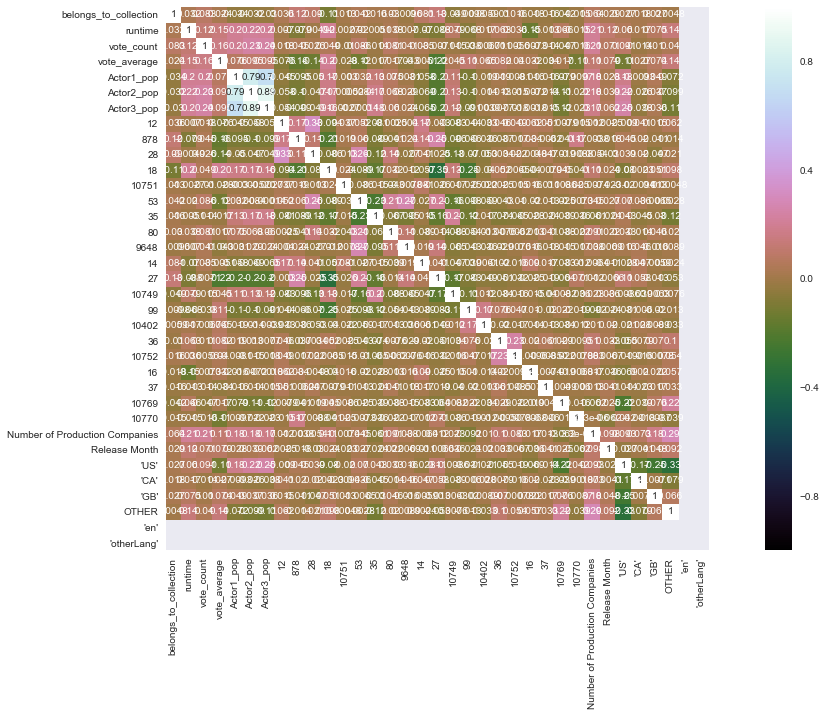

In [114]:
corr_mat=X.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [108]:
X_train = np.asarray(X.drop(['vote_average','vote_count'],axis=1).values)
X_std=StandardScaler().fit_transform(X_train)
X_train = X_std

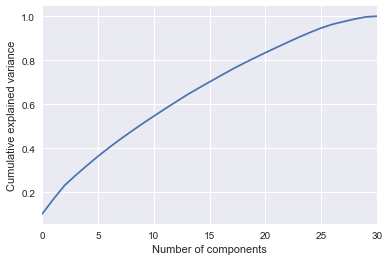

In [109]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,30,2)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [7]:
sklearn_pca=PCA(n_components=20)
X_train=sklearn_pca.fit_transform(X_std)

In [115]:
y = X['vote_average']
X = X_train

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.33,random_state=12)

In [116]:
from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [118]:
alphas = [0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 100, 200, 1000, 5000]
r_cv = RidgeCV(alphas=alphas)
r_cv.fit(train_X,train_y)
print r_cv.alpha_
print r_cv.score(test_X,test_y)
print mean_squared_error(test_y,r_cv.predict(test_X))

200.0
0.135559594504
1.84503943388


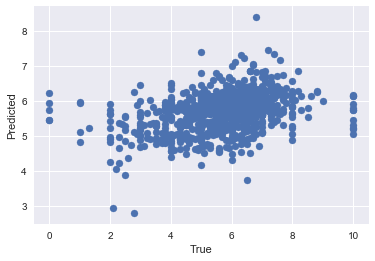

In [119]:
plt.scatter(test_y,r_cv.predict(test_X))
plt.xlabel('True') 
plt.ylabel('Predicted') 

In [120]:
l1_ratio = [.1, .5, .7, .9, .95, .99, 1]
en_cv = ElasticNetCV(alphas=alphas,l1_ratio=l1_ratio)
en_cv.fit(train_X,train_y)
print en_cv.alpha_
print en_cv.l1_ratio_
print en_cv.score(test_X,test_y)
print mean_squared_error(test_y,en_cv.predict(test_X))

0.3
0.1
0.129169564255
1.85867815058


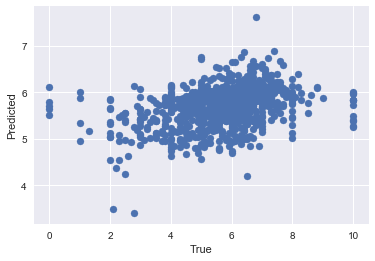

In [121]:
plt.scatter(test_y,en_cv.predict(test_X))
plt.xlabel('True') 
plt.ylabel('Predicted') 

In [122]:
from sklearn.neighbors import KNeighborsRegressor

In [123]:
knn = GridSearchCV(KNeighborsRegressor(),dict(n_neighbors=np.arange(1,5)),cv=5,scoring='neg_mean_squared_error')

In [124]:
knn.fit(train_X,train_y)
print knn.score(test_X,test_y)
print mean_squared_error(test_y,knn.predict(test_X))

-2.23773600439
2.23773600439


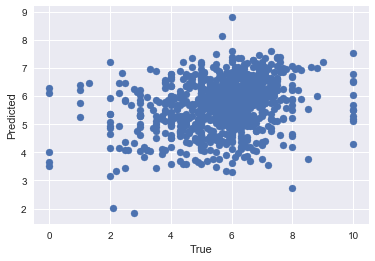

In [125]:
plt.scatter(test_y,knn.predict(test_X))
plt.xlabel('True') 
plt.ylabel('Predicted') 

In [126]:
from sklearn.tree import DecisionTreeRegressor

In [127]:
dtree = GridSearchCV(DecisionTreeRegressor(), dict(min_samples_split=[4,16,64,256,1024],min_samples_leaf=[4,16,64,256,1024],splitter=['best','random']),cv=5,scoring='neg_mean_squared_error')

In [128]:
dtree.fit(train_X,train_y)
print dtree.score(test_X,test_y)
print mean_squared_error(test_y,dtree.predict(test_X))

-1.88227866291
1.88227866291


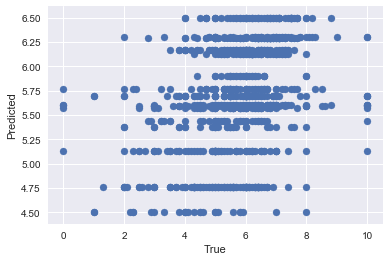

In [129]:
plt.scatter(test_y,dtree.predict(test_X))
plt.xlabel('True') 
plt.ylabel('Predicted') 

In [130]:
from xgboost import XGBRegressor

In [131]:
# xgb1 = XGBRegressor(learning_rate=0.1,n_estimators=1000,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='reg:linear',scale_pos_weight=1,seed=1)
# def fit(xgb1,trainX,trainY):
#     param = xgb1.get_params()
#     xgbtrain = xgb.DMatrix(trainX,label=trainY.values)
#     cv = xgb.cv(param,xgbtrain,num_boost_round=param['n_estimators'],nfold=5,metrics='mse', early_stopping_rounds=50)
#     xgb1.set_params(n_estimators=cv.shape[0])
#     xgb1.fit(trainX,trainY,eval_metric='mse')

In [132]:
train_X.shape

(1847L, 33L)

In [133]:
xgb2 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4,scale_pos_weight=1,seed=27), 
 param_grid = dict(max_depth=range(1,4),min_child_weight=range(2,6)), scoring='neg_mean_squared_error',iid=False, cv=5)
xgb2.fit(train_X,train_y)
print xgb2.best_params_, xgb2.best_score_
print xgb2.score(test_X,test_y)
print mean_squared_error(test_y,xgb2.predict(test_X))

{'max_depth': 1, 'min_child_weight': 4} -1.9632337551
-1.83555815474
1.83555815474


In [136]:
xgb3 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=140, max_depth=1,
 min_child_weight=4, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', scale_pos_weight=1,seed=27), 
 param_grid = dict(gamma=[i/10.0 for i in range(1,8)]), scoring='neg_mean_squared_error',iid=False, cv=5)
xgb3.fit(train_X,train_y)
print xgb3.best_params_, xgb3.best_score_
print mean_squared_error(test_y,xgb3.predict(test_X))

{'gamma': 0.1} -1.9632337551
1.83555815474


In [137]:
xgb4 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=140, max_depth=1,
 min_child_weight=4, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', scale_pos_weight=1,seed=27), 
 param_grid = dict(subsample=[i/10.0 for i in range(7,10)],colsample_bytree=[i/10.0 for i in range(2,6)]), 
 scoring='neg_mean_squared_error',iid=False, cv=5)
xgb4.fit(train_X,train_y)
print xgb4.best_params_, xgb4.best_score_
print mean_squared_error(test_y,xgb4.predict(test_X))

{'subsample': 0.9, 'colsample_bytree': 0.4} -1.95738766351
1.84153637374


In [138]:
xgb5 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=140, max_depth=1,
 min_child_weight=4, gamma=0.1, subsample=0.5, colsample_bytree=0.8,
 objective= 'reg:linear', scale_pos_weight=1,seed=27), 
 param_grid = dict(subsample=[i/100.0 for i in range(85,90,5)],colsample_bytree=[i/100.0 for i in range(35,50,5)]), 
 scoring='neg_mean_squared_error',iid=False, cv=5)
xgb5.fit(train_X,train_y)
print xgb5.best_params_, xgb5.best_score_
print mean_squared_error(test_y,xgb5.predict(test_X))

{'subsample': 0.85, 'colsample_bytree': 0.45} -1.96070093708
1.83620289086


In [139]:
xgb6 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=140, max_depth=1,
 min_child_weight=4, gamma=0.1, subsample=0.85, colsample_bytree=0.45,
 objective= 'reg:linear', scale_pos_weight=1,seed=27), 
 param_grid = dict(reg_alpha=[1e-5, 1e-2, 0.1, 1, 100],reg_lambda=[1e-5, 1e-2, 0.1, 1, 100]), 
 scoring='neg_mean_squared_error',iid=False, cv=5)
xgb6.fit(train_X,train_y)
print xgb6.best_params_, xgb6.best_score_
print mean_squared_error(test_y,xgb6.predict(test_X))

{'reg_alpha': 0.01, 'reg_lambda': 0.01} -1.95746549767
1.83281557333


In [140]:
xgb7 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=140, max_depth=1,
 min_child_weight=4, gamma=0.1, subsample=0.85, colsample_bytree=0.45,
 objective= 'reg:linear', scale_pos_weight=1,seed=27), 
 param_grid = dict(reg_alpha=[0, 1e-3,1e-2,1e-1],reg_lambda=[0, 1e-3,1e-2,1e-1]), 
 scoring='neg_mean_squared_error',iid=False, cv=5)
xgb7.fit(train_X,train_y)
print xgb7.best_params_, xgb7.best_score_
print mean_squared_error(test_y,xgb7.predict(test_X))

{'reg_alpha': 0.01, 'reg_lambda': 0.01} -1.95746549767
1.83281557333


In [141]:
xgb8 = GridSearchCV(estimator = XGBRegressor( learning_rate=0.1, n_estimators=140, max_depth=2,
 min_child_weight=4, gamma=0.1, subsample=0.85, colsample_bytree=0.45,
 reg_alpha=0.01,reg_lambda=0.01,
 objective= 'reg:linear', scale_pos_weight=1,seed=27), 
 param_grid = dict(learning_rate=[0.001,0.005,0.01,0.05],n_estimators=[500,1000,5000]), 
 scoring='neg_mean_squared_error',iid=False, cv=5)
xgb8.fit(train_X,train_y)
print xgb8.best_params_, xgb8.best_score_
print mean_squared_error(test_y,xgb8.predict(test_X))

KeyboardInterrupt: 

In [142]:
xgb8 = XGBRegressor( learning_rate=0.01, n_estimators=5000, max_depth=1,
 min_child_weight=4, gamma=0.1, subsample=0.85, colsample_bytree=0.45,
 reg_alpha=0.01,reg_lambda=.01,
 objective= 'reg:linear', scale_pos_weight=1)
# fit(xgb8,train_X,train_y)
xgb8.fit(train_X,train_y)
print xgb8.score(train_X,train_y)
print mean_squared_error(test_y,xgb8.predict(test_X))

0.223922761366
1.82272503249


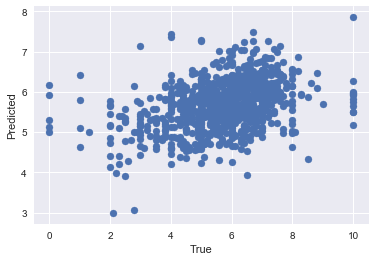

In [143]:
plt.scatter(test_y,xgb8.predict(test_X))
plt.xlabel('True') 
plt.ylabel('Predicted') 

In [64]:
preds = np.array(xgb8.predict(test_X))
mean_squared_error(test_y,preds)

0.87780639245140535

In [65]:
pred = pd.DataFrame(preds,index = test_y.index,columns=['prediction'])

In [66]:
out = pd.concat((pred,test_y),axis=1)
out.to_csv('data/predictions2.csv')

In [57]:
preds = []
for i in range(50):
    xgb8 = XGBRegressor( learning_rate=0.01, n_estimators=5000, max_depth=2,
     min_child_weight=4, gamma=0.1, subsample=0.7, colsample_bytree=0.3,
     reg_alpha=0.01,reg_lambda=1, seed=i,
     objective= 'reg:linear', scale_pos_weight=1)
    # fit(xgb8,train_X,train_y)
    xgb8.fit(train_X,train_y)
    print 'R{}:'.format(i),xgb8.score(train_X,train_y)
    p = xgb8.predict(test_X)
    print 'R{}:'.format(i),mean_squared_error(test_y,p)
    preds.append(p)

R0: 0.507030378611
R0: 4.75594912011
R1: 0.507285906748
R1: 4.75525575859
R2: 0.508757152083
R2: 4.75848896977
R3: 0.507784511243
R3: 4.752566501
R4: 0.508517540941
R4: 4.73854619485
R5: 0.506859023334
R5: 4.77239397145
R6: 0.507895870417
R6: 4.76307963836
R7: 0.509104586296
R7: 4.75180732345
R8: 0.507826371835
R8: 4.75277927338
R9: 0.507510291877
R9: 4.74484260068
R10: 0.506511712934
R10: 4.75576507499
R11: 0.508154350112
R11: 4.75609933684
R12: 0.509634219126
R12: 4.76972333056
R13: 0.509235974906
R13: 4.7658857315
R14: 0.508270130955
R14: 4.74036909849
R15: 0.507764914878
R15: 4.73206933056
R16: 0.508192686201
R16: 4.73688777666
R17: 0.508565282111
R17: 4.77882217934
R18: 0.506486686772
R18: 4.75007570771
R19: 0.507146313315
R19: 4.75025452349
R20: 0.509110311039
R20: 4.76482838509
R21: 0.508041334252
R21: 4.78819572368
R22: 0.507973567797
R22: 4.77818848351
R23: 0.507548549857
R23: 4.73607925943
R24: 0.508197823023
R24: 4.7339977729
R25: 0.506171228176
R25: 4.74814174201
R26: 0.509

In [82]:
preds = np.array(preds)
mean_squared_error(test_y,preds.mean(axis=0))

4.7495500016223371

In [63]:
pred = pd.DataFrame(preds.mean(axis=0),index = test_y.index,columns=['prediction'])

In [70]:
out = pd.concat((pred,test_y),axis=1)
out.to_csv('data/predictions3.csv')

In [78]:
out = pd.concat((pred,test_y),axis=1)

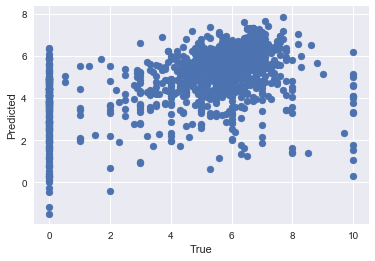

In [80]:
plt.scatter(test_y,pred)
plt.xlabel('True') 
plt.ylabel('Predicted') 

In [144]:
print xgb8.feature_importances_
print trainSet.columns

[ 0.0246      0.1794      0.12540001  0.1024      0.1504      0.008       0.0186
  0.027       0.0282      0.002       0.0136      0.005       0.0058      0.018
  0.0046      0.0182      0.0052      0.0358      0.0072      0.0134
  0.0008      0.0226      0.0134      0.0012      0.0244      0.0442
  0.0502      0.0244      0.0152      0.0014      0.0094      0.          0.        ]
Index([u'belongs_to_collection', u'runtime', u'vote_count', u'vote_average',
       u'Actor1_pop', u'Actor2_pop', u'Actor3_pop', u'12', u'878', u'28',
       u'18', u'10751', u'53', u'35', u'80', u'9648', u'14', u'27', u'10749',
       u'99', u'10402', u'36', u'10752', u'16', u'37', u'10769', u'10770',
       u'Number of Production Companies', u'Release Month', u''US'', u''CA'',
       u''GB'', u'OTHER', u''en'', u''otherLang''],
      dtype='object')
